In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [45]:
# Load decoder output
output_traj = np.load('saved_results/decoder_result/_springsLight5output.npy')
target_traj = np.load('saved_results/decoder_result/_springsLight5target.npy')

# Set the simulation index as 4, batch index as 4. You can use other trials. 
traj = output_traj[4,4,:,:,:]

fig, ax = plt.subplots()
ax.set(xlim=(-0.5,0.5), ylim=(-0.5, 0.5))

line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
line3, = ax.plot([], [], lw=2)
line4, = ax.plot([], [], lw=2)
line5, = ax.plot([], [], lw=2)

def animate(time_index):
    line1.set_data(traj[0,:time_index,0], traj[0,:time_index,1])
    line2.set_data(traj[1,:time_index,0], traj[1,:time_index,1])
    line3.set_data(traj[2,:time_index,0], traj[2,:time_index,1])
    line4.set_data(traj[3,:time_index,0], traj[3,:time_index,1])
    line5.set_data(traj[4,:time_index,0], traj[4,:time_index,1])
    return line1,line2,line3,line4,line5

anim = animation.FuncAnimation(fig, animate, frames = target_traj.shape[-2],interval=100)
anim.save("demo_model_out.gif", writer="pillow", dpi=200)

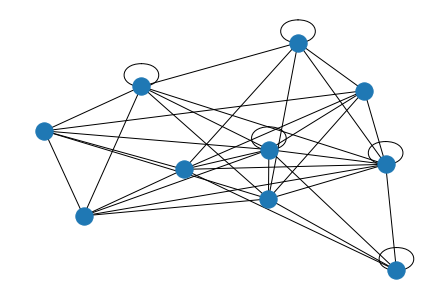

In [29]:
import networkx as nx
enc_edges = np.load('saved_results/encoder_result/_springsLight5.npy')

# Construct graph for index 0
edges = enc_edges[0]

def is_edge(row):
    return 1 if row[0] > row[1] else 0

t = np.apply_along_axis(is_edge, 1, traj)
n = int(len(t)**0.5)
adj = t.reshape(n, n)

G = nx.from_numpy_matrix(adj)
nx.draw(G)
# plt.savefig('figures/encoder_graph.png')